In [1]:
# First, some imports and auxiliary functions.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from numba import *

def drawWin(win):
    
    
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlim3d(-2,3)
    ax.set_ylim3d(-2,3)
    ax.set_zlim3d(-2,2)

    drawBox(ax,0.)

    points = []
    
    for piece, loc in win:
        
        pointsSet = []
        
        for block in piece:
            
            pointsSet.append(np.asarray(block)+np.asarray(loc))
        
        points.append(np.asarray(pointsSet))
        
    for pointsSet in points:
        ax.scatter(pointsSet[:,0],pointsSet[:,1],pointsSet[:,2],marker="o", s=400)
        
    plt.show()
def drawWorld(wo):
    
    w = wo.copy()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlim3d(-2,3)
    ax.set_ylim3d(-2,3)
    ax.set_zlim3d(-2,2)

    drawBox(ax,0.0)
    
    points = []
    
    for i in range(w.shape[0]):
        for j in range(w.shape[1]):
            for k in range(w.shape[2]):
                while w[i,j,k] > 0:
                    w[i,j,k] -= 1
                    points.append([i,j,k])
                    
    points = np.asarray(points)-2

    ax.scatter(points[:,0],points[:,1],points[:,2],marker="o", s=400)
    plt.show()    
def drawBox(ax, margin=0.5, color="black"):
    ax.plot([0-margin,2+margin],[0-margin,0-margin],[0-margin,0-margin], c=color,  dashes=[2,2], zorder=1000.)
    ax.plot([2+margin,2+margin],[2+margin,0-margin],[0-margin,0-margin], c=color,  dashes=[2,2], zorder=1000.)
    ax.plot([0-margin,0-margin],[2+margin,0-margin],[0-margin,0-margin], c=color,  dashes=[2,2], zorder=1000.)
    ax.plot([2+margin,0-margin],[2+margin,2+margin],[0-margin,0-margin], c=color,  dashes=[2,2], zorder=1000.)
    ax.plot([0-margin,2+margin],[0-margin,0-margin],[2+margin,2+margin], c=color,  dashes=[2,2], zorder=1000.)
    ax.plot([2+margin,2+margin],[2+margin,0-margin],[2+margin,2+margin], c=color,  dashes=[2,2], zorder=1000.)
    ax.plot([0-margin,0-margin],[2+margin,0-margin],[2+margin,2+margin], c=color,  dashes=[2,2], zorder=1000.)
    ax.plot([2+margin,0-margin],[2+margin,2+margin],[2+margin,2+margin], c=color,  dashes=[2,2], zorder=1000.)
    ax.plot([0-margin,0-margin],[0-margin,0-margin],[2+margin,0-margin], c=color,  dashes=[2,2], zorder=1000.)
    ax.plot([2+margin,2+margin],[2+margin,2+margin],[2+margin,0-margin], c=color,  dashes=[2,2], zorder=1000.)
    ax.plot([2+margin,2+margin],[0-margin,0-margin],[2+margin,0-margin], c=color,  dashes=[2,2], zorder=1000.)
    ax.plot([0-margin,0-margin],[2+margin,2+margin],[2+margin,0-margin], c=color,  dashes=[2,2], zorder=1000.)
        
def drawMoves(win, size=(8,5), putPiecesIn=[1,2,3,4,5,6], title="", arrange=230):
    
    points = []
    
    for piece, loc in win:
        
        pointsSet = []
        
        for block in piece:
            
            pointsSet.append(np.asarray(block)+np.asarray(loc))
        
        points.append(np.asarray(pointsSet))

    fig = plt.figure(figsize=size)
    colors = sns.color_palette("hls", len(win))
    
    for i,j in zip(range(len(points)),putPiecesIn):
        
        
        
        ax = fig.add_subplot(arrange+j, projection='3d')

        ax.set_xlim3d(0,2)
        ax.set_ylim3d(0,2)
        ax.set_zlim3d(0,2)
        ax.axis('off')
        drawBox(ax,0.)
        
        j=0
        for pointsSet in points[0:i]:

            for pta in pointsSet:
                for ptb in pointsSet:
                    dis = np.sum(np.abs(pta-ptb))
                    if  dis == 1:
                        z = (pta[0]+ptb[0])/2. - (pta[1]+ptb[1])/2.
                        ax.plot3D([pta[0], ptb[0]],[pta[1], ptb[1]],[pta[2], ptb[2]], c=colors[j],
                                linewidth=8, solid_capstyle='round', zorder=z)
            
            
            j+=1
            
     
        for pta in points[i]:
            for ptb in points[i]:
                dis = np.sum(np.abs(pta-ptb))
                if  dis == 1:
                    z = (pta[0]+ptb[0])/2. - (pta[1]+ptb[1])/2.
                    ax.plot3D([pta[0], ptb[0]],[pta[1], ptb[1]],[pta[2], ptb[2]], c=colors[j],
                              linewidth=10,solid_capstyle='round', zorder=z)
        
        
    ax.annotate(title+".", [.92,0.1], xycoords="figure fraction")
    plt.show()    
def drawMovesSave(win, name, size=(8,5), putPiecesIn=[1,2,3,4,5,6], title="", arrange=230):
    
    
    points = []
    
    for piece, loc in win:
        
        pointsSet = []
        
        for block in piece:
            
            pointsSet.append(np.asarray(block)+np.asarray(loc))
        
        points.append(np.asarray(pointsSet))

    fig = plt.figure(figsize=size)
    colors = sns.color_palette("hls", len(win))
    
    for i,j in zip(range(len(points)),putPiecesIn):
        
        
        
        ax = fig.add_subplot(arrange+j, projection='3d')

        ax.set_xlim3d(0,2)
        ax.set_ylim3d(0,2)
        ax.set_zlim3d(0,2)
        ax.axis('off')
        drawBox(ax,0.)
        
        j=0
        for pointsSet in points[0:i]:

            for pta in pointsSet:
                for ptb in pointsSet:
                    dis = np.sum(np.abs(pta-ptb))
                    if  dis == 1:
                        z = (pta[0]+ptb[0])/2. - (pta[1]+ptb[1])/2.
                        ax.plot3D([pta[0], ptb[0]],[pta[1], ptb[1]],[pta[2], ptb[2]], c=colors[j],
                                linewidth=8, solid_capstyle='round', zorder=z)
            
            #ax.scatter(pointsSet[:,0],pointsSet[:,1],pointsSet[:,2],c=colors[j],marker="o",
            #           s=400, edgecolor='black')
            
            j+=1
            
        #ax.scatter(points[i][:,0],points[i][:,1],points[i][:,2],marker="o",
        #           c=colors[j],linewidth=2,  s=400, edgecolor='black')
        
        
        for pta in points[i]:
            for ptb in points[i]:
                dis = np.sum(np.abs(pta-ptb))
                if  dis == 1:
                    z = (pta[0]+ptb[0])/2. - (pta[1]+ptb[1])/2.
                    ax.plot3D([pta[0], ptb[0]],[pta[1], ptb[1]],[pta[2], ptb[2]], c=colors[j],
                              linewidth=10,solid_capstyle='round', zorder=z)
        
        
    ax.annotate(title+".", [.92,0.1], xycoords="figure fraction")
    plt.savefig(name)    
    
import itertools

def rotations24(a):
    n = a.ndim
    axcomb = list(itertools.permutations(range(n), n)) # all axes combinations    
    pcomb = list(itertools.product([1,-1], repeat=n)) # all permuted orders
    out = np.zeros((6,8,) + a.shape,dtype=a.dtype) # Initialize output array    
    for i,ax in enumerate(axcomb): #loop through all axes for permuting
        for j,(fx,fy,fz) in enumerate(pcomb): # all flipping combinations
            out[i,j] = np.transpose(a[::fx,::fy,::fz],ax) 
            
    idx = np.array([ 0,  3,  5,  6,  9, 10, 12, 15, 17, 18, 20, 23, 24, 27, 29, 30, 32, 35, 37, 38, 41, 42, 44, 47])
    
    return out.reshape(6*8,3,3,3)[idx]
def fingerprint(sol):
    
    world = np.zeros((7,7,7), np.int32)
    
    keys = range(1,100)
    
    index = 0
    for p,l in sol:
        
        for i in range(p.shape[0]):
            if world[2+l[0]+p[i][0], 2+l[1]+p[i][1], 2+l[2]+p[i][2]] != 0:
                print("ERROR!")
            world[2+l[0]+p[i][0], 2+l[1]+p[i][1], 2+l[2]+p[i][2]] = keys[index]
        index+=1
    
    return world[2:5,2:5,2:5]
def piece_to_unique_rotations_as_block_lists(template):
    blocksGeneral = []

    
    for fig in rotations24(template):
        blocks = []
        orig = None    
        origFoundFlag = False
        
        for i in range(fig.shape[0]):
            for j in range(fig.shape[1]):
                for k in range(fig.shape[2]):
                
                    if origFoundFlag:
                        if fig[i,j,k] != 0:
                            blocks.append([i-orig[0],j-orig[1], k-orig[2]])
                    
                    else:
                    
                        if fig[i,j,k] != 0:
                            orig = [i,j,k]
                            blocks.append([0,0,0])
                            origFoundFlag = True
        
        
        if not any([np.array_equal(np.asarray(b), np.asarray(blocks)) for b in blocksGeneral]):
            blocksGeneral.append(blocks)        
            
    return np.asarray(blocksGeneral)

In [2]:
# These are the core functions of the algorithm.

@jit(nopython=True)
def place(p, wo, l):
    
    """ Place a figure p in the world representation wo at location l
        then return the resulting world representation
    """
    
    # Note that we copy the input world representation so we dont modify it.
    w = wo.copy()
    for i in range(p.shape[0]):
        w[2+l[0]+p[i][0], 2+l[1]+p[i][1], 2+l[2]+p[i][2]] += 1

    return w

@jit(nopython=True)
def check(w):
    
    """ Check if a world representation w is valid:
         a) no figures overlap in space
         b) no figures are outside of the 3x3x3 cube
    """
    
    if np.sum(w>1) == 0 and (np.sum(w)-np.sum(w[2:5, 2:5,2:5])) == 0:
        return True
    else:
        return False
    
def explore(pieces, n_pieces=None, world=None, soFar=[], solutions=None, max_solutions=None, verbose=True):
        
        """
        Main function for the exploration of solutions. Recursivelly explores al posible combinations of positions
        and orientations of the pieces, pruning branches when a non-valid configuration is found. This exploits the fact
        that the order in which the figures are placed is irrelevant.
        
        Parameters
        ----------
        
        pieces:     list of pieces for the puzzle, where each piece has been generated by calling pieceGen()
        
        n_pieces:   No need to set this variable manually. Used in the recursive calls to know whether all pieces
                    have been placed. 
                  
        world:      No need to set this variable manually. It is a 7x7x7 representation of the current state of the
                    cube we are building (occupancy only). It is 7x7x7 to avoid exceptions when part of a piece is outside
                    the 3x3x3 cube.
                  
        soFar:      No need to set this variable manually. List of the figures we have placeed so far, alongside with their
                    location. Each recursive call creates its own copy of this variable.
                  
        solutions:  No need to set this variable manually. List of solutions found so far. 
        
        """
        
        # Some variables are initialized by the first call to the function explore() 
        # The conde inside these If's is executed only at the top call in the recursive tree 
        
        if type(solutions) == type(None):
            solutions = []
            if np.sum([piece.shape[1] for piece in pieces]) != 3**3:
                return []
            
        if type(world) == type(None):
            world = np.zeros((7,7,7), np.int32)
            
        if type(n_pieces) == type(None):
            n_pieces = len(pieces)
            
        # Generate all posible locations [(0,0,0), (0,0,1), ...]
        loc = np.asarray(list(itertools.product([0,1,2],[0,1,2],[0,1,2])), dtype=np.int32)
            
        # For each orientation of the first piece in the list of pieces...
        for orient in pieces[0]:
            
            # For each posible location ...
            for l in loc:
                
                #We place the piece with the current orientation in the current location
                worldT = place(orient, world, l)
                
                #Then we evaluate the resulting representation of the world.
                # If no blocks are outside of the 3x3x3 cube and no pieces overlap...
                if check(worldT):
                    
                    # If the piece we just placed was the last one, we have found a solution
                    if len(soFar) == (n_pieces-1):
                        
                        #create a copy of the list of movements that took us here
                        soFarT = list(soFar)
                        
                        #add the last movement we made, which completed the solution
                        soFarT.append([orient, l])
                        
                        # add the solution we just found to the list of solutions... and keep searching
                        solutions.append(soFarT)
                        solutions = findUnique(solutions)
                        if verbose:
                            print("Solution %d found."%(len(solutions)))
                        if max_solutions is not None and len(solutions) > max_solutions:
                            if verbose:
                                print("Max_solutions exceeded. Aborting search.")
                            return None

                    # If the piece we just placed is not the last one...
                    else:
                        
                        #Create a copy of the list of movements we have made (so recursive calls do not modify our copy)
                        soFarT = list(soFar)
                        
                        #add the last movement we made
                        soFarT.append([orient, l])
                        
                        #recursivelly cal explore(), setting pieces=pieces[1:], so the recursive call only has to place
                        # the remaining pieces to finish the puzzle. This limits the depth of the recursive tree to the 
                        # number of pieces in the puzzle
                        solutions = explore(pieces[1:], n_pieces=n_pieces, world=worldT, soFar=soFarT,
                                            solutions=solutions, max_solutions=max_solutions)
                        
                        if solutions is None:
                            return None
        
        #Note that, if a particular orientation of a piece cant be placed succesfully, we do not explore that branch
        # in the tree of posible combinations, so we are effectivelly pruning this tree, making things faster.
        # This is much faster that the naive brute force approach of testing all posible piece-orientation-location combinations
        # looking for solutions. Another trick to speed things up is the fact that the function piece_to_unique_rotations_as_block_lists() removes orientations
        # that are equivalent for pieces with simetry, so not all pieces have 26 different orientations.
        
        # finally, return all solutions found
        return solutions

## Finding all posible solutions to one puzzle

We define a puzzle with 6 different figures and use the explore() function to find all possible solutions to it. Note that the solutions we find here are not necessary unique, so we will have to filter them later.

runing times vary depending on the difficulty of the puzzle (i.e., number of figures, number of valid placements, diferent orientations of the pieces...). For example, the following 6-piece, 12 unique solutions puzzle takes arround 15 min on my laptop (i5-2450 - 2.5Ghz). Unfortunatelly, 7-piece puzzles may take anywhere form 1 to 12 hours, depending on the difficulty. 

In [11]:
# First, we define the pieces. For that, we simply "draw" them in 3D inside of a 3x3x3 cube.
# The orientation and location in which we draw them is meaningless since 

#   1) we later use piece_to_unique_rotations_as_block_lists() to create  all possible orientations of the pieces,
#      removing redundat orientations due to symmetry. 

#   2) The representation of pieces
#      generated by piece_to_unique_rotations_as_block_lists() is invariant to location.


f1 = np.asarray(
     [[[0,1,0],
       [1,1,0],
       [0,1,0]],
     
      [[0,0,0],
       [1,0,0],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],])

f2 = np.asarray(
     [[[0,1,1],
       [0,0,1],
       [0,0,0]],
     
      [[0,1,0],
       [0,0,1],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],])

f3 = np.asarray(
     [[[1,1,0],
       [1,0,0],
       [0,0,0]],
     
      [[0,0,0],
       [0,0,0],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],])

f4 = np.asarray(
     [[[0,0,0],
       [1,1,1],
       [1,0,1]],
     
      [[0,0,0],
       [0,0,0],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],])

f5 = np.asarray(
     [[[0,0,1],
       [0,1,1],
       [0,1,0]],
     
      [[0,0,0],
       [0,0,0],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],])

f6 = np.asarray(
     [[[0,0,0],
       [0,1,1],
       [0,1,1]],
     
      [[0,0,0],
       [0,0,1],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],])


In [17]:
    f1 = np.asarray(
                    [[[1, 1, 1],
                      [1, 1, 1],
                      [1, 1, 1]],

                     [[0, 0, 0],
                      [0, 1, 0],
                      [0, 0, 0]],

                     [[0, 0, 0],
                      [0, 0, 0],
                      [0, 0, 0]], ])

    f2 = np.asarray(
                    [[[1, 1, 1],
                      [1, 1, 1],
                      [1, 1, 1]],

                     [[1, 1, 1],
                      [1, 0, 1],
                      [1, 1, 1]],

                     [[0, 0, 0],
                      [0, 0, 0],
                      [0, 0, 0]], ])

In [20]:
# Here we solve the puzzle 

# First, we generate the list of pieces (each is a list containing all possible orientations, as generated by piece_to_unique_rotations_as_block_lists())
pieces = [piece_to_unique_rotations_as_block_lists(f) for f in [f1,f2]]

# Now, we find all solutions.
solutions = explore(pieces)

print ("Non-unique solutions found: %d"%(len(solutions))) #6m44s

Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Non-unique solutions found: 1


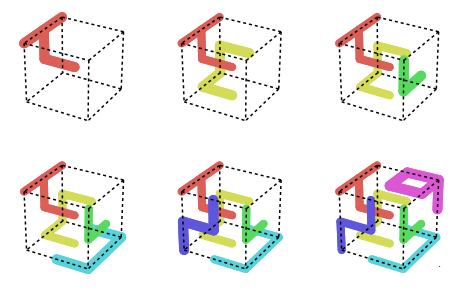

In [64]:
# Show the first solution we found.

drawMoves(solutions[0], size=(8,5), arrange=230, putPiecesIn=[1,2,3,4,5,6])

# drawMoves is kind of a messy function... simply use it as shown above for puzzles with 6 pieces.
# for puzzles with 7 piezes you can use:

# drawMoves(solutions[0], size=(12,6), arrange=240, putPiecesIn=[1,2,3,4,5,6,7])

### Filtering solutions to find the unique ones

So far we have found all possible solutions to the puzzle, but some of them are repeated. Also, some solutions correspond to rotated versions of other solutions. We are more interested in the number of Unique solutions. This is, solutions that involve placing a piece in a different position or orientation.

In [19]:
def findUnique(solutions, verbose=False):
    """
    Takes a set of non-unique solutions to a 3x3x3 puzzle and returns a list of unique solutions. That is, given a solution,
    do not consider the 26 rotated versions of that cube as different solutions. 
    
    The idea is simple: initialize a list with the first solution found. Then, for each non-unique solution, test if a rotated
    version of it is in the that list. If not, add it to the list. 
    
    IMPORTANT NOTE: If the puzzle contains two identical pieces, this function will identify two solutions where the
    identical pieces are swaped as different. This can be modified altering the variable keys in function fingerprint()

    Parameters
    ----------

    solutions:  list of non-unique solutions as returned by explore()
    
    """
    
    # initialize list of unique solutions
    unique_success = [solutions[0]]
    
    # initialize a list with the fingerprints of unique solutions
    # in this context a fingerprint is a 3x3x3 matrix where each entry is an integer representing
    # the figure that occupies that region of space. Each figure/piece has a different integer identifier
    unique_finger =  [fingerprint(solutions[0])]
    
    if verbose:
        print( "Unique found... (%d)."%(len(unique_success)))
    
    i = 0
    # for each solution in the list of non-unique solutions...
    for suc in solutions[1:]:

        # generate the 24 rotated versions of one fingerprint of the solution
        rots = rotations24(fingerprint(suc))

        # by default, assume this solution is one we have not seen before
        unique_flag = True

        # if any of the rotated fingerprints of the solution is in our list of fingerprints, 
        # the solution is not a new one. Mark the flag as false.
        for rot in rots:
            for uni in unique_finger:
                if np.all(rot == uni):
                    unique_flag = False

        if verbose and i%100 == 0:
            print( "Progress: %.2f%%"%(100*i/float(len(solutions))))        

            
        # If none of the rotated versions of the solution is in our list of fingerprints, the solution
        # is indeed new. We add it to the list of unique solutions, and its fingerprint to the list of
        # fingerprints.
        if unique_flag:
            unique_finger.append(fingerprint(suc))
            unique_success.append(suc)
            if verbose:
                print("Unique found... (%d)."%(len(unique_success)))

        i+=1
        
    return unique_success

In [74]:
unique = findUnique(solutions)

print("__________________________")
print("Unique solutions found: %d"%len(unique))

Unique found... (1).
Progress: 0.00%
Unique found... (2).
Unique found... (3).
Unique found... (4).
Unique found... (5).
Unique found... (6).
Unique found... (7).
Unique found... (8).
Unique found... (9).
Unique found... (10).
Unique found... (11).
Unique found... (12).
Progress: 34.72%
Progress: 69.44%
__________________________
Unique solutions found: 12


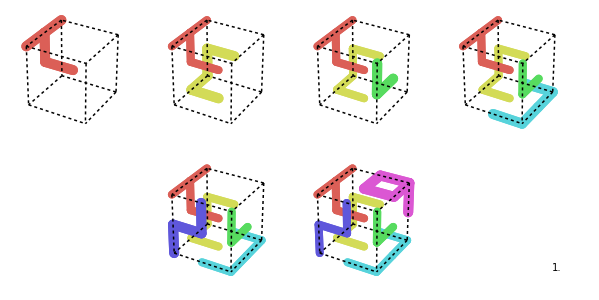

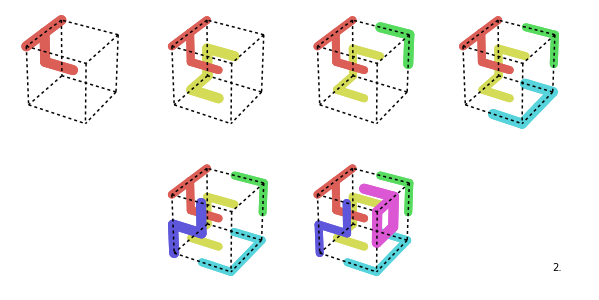

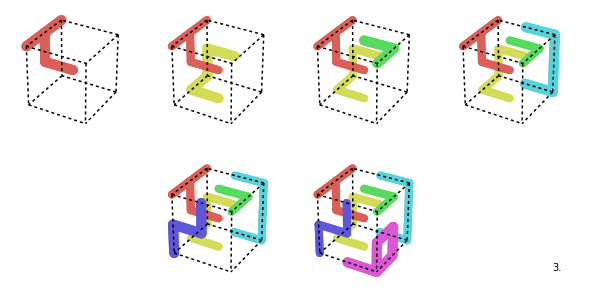

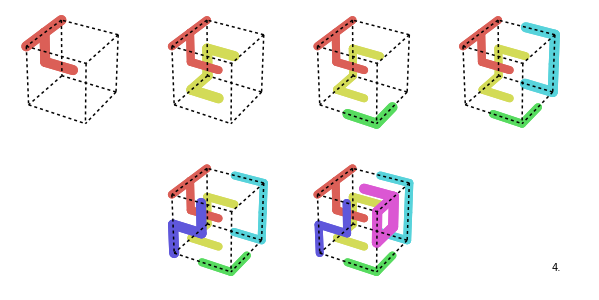

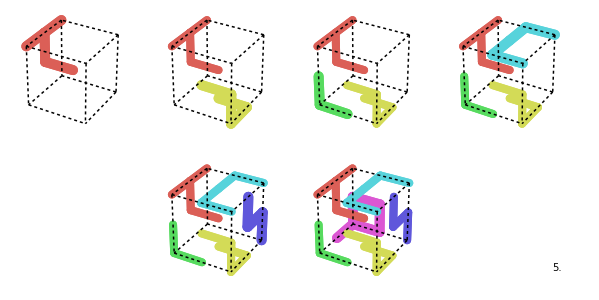

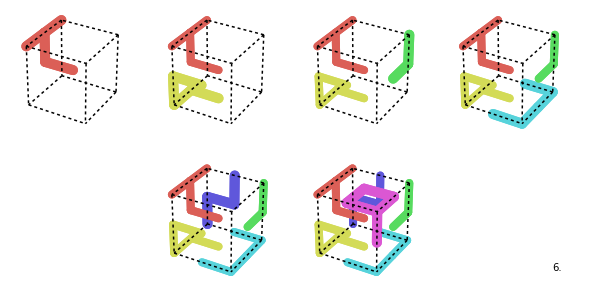

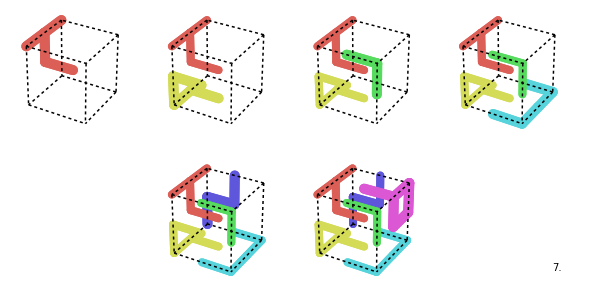

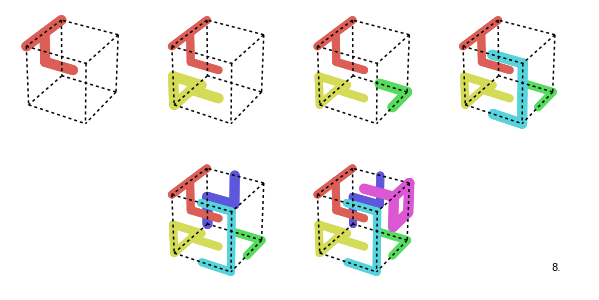

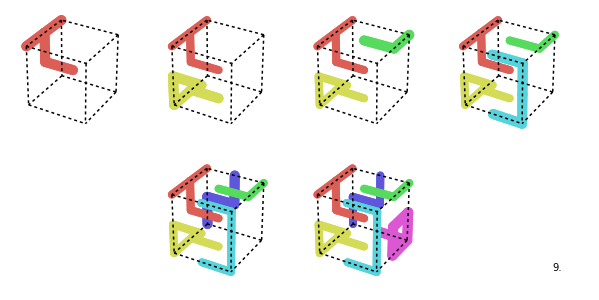

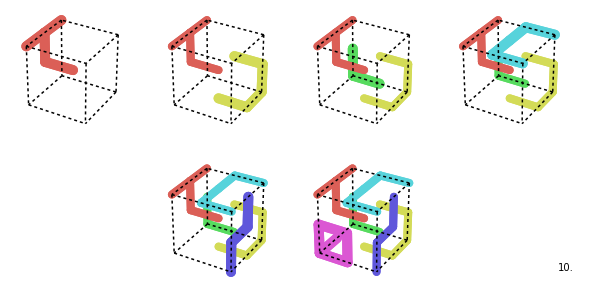

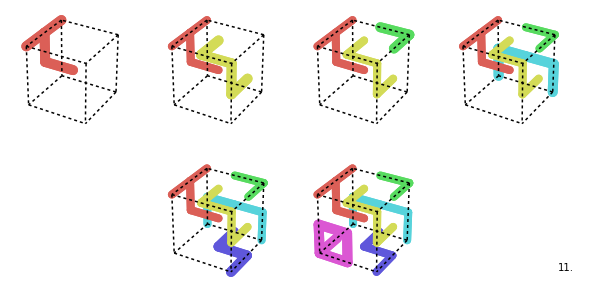

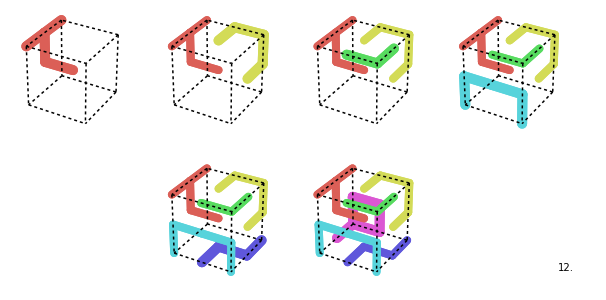

In [21]:
# Save all unique solutions in disk as separate images.

for i, solution in enumerate(unique):
    
    drawMovesSave(solution, "./solution-%d.png"%(i+1), size=(10,5), arrange=240, putPiecesIn=[1,2,3,4,6,7,8], title=str(i+1))


## Find new puzzles:

In [152]:
allpieces = []

allpieces.append(np.asarray(
     [[[1,1,0],
       [0,1,0],
       [0,1,0]],
     
      [[0,0,0],
       [0,0,0],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],]))

allpieces.append(np.asarray(
     [[[0,1,1],
       [0,0,1],
       [0,0,0]],
     
      [[0,1,0],
       [0,0,1],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],]))

allpieces.append(np.asarray(
     [[[0,1,1],
       [0,0,1],
       [0,0,0]],
     
      [[0,1,0],
       [0,0,0],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],]))

allpieces.append(np.asarray(
     [[[0,1,1],
       [0,0,1],
       [0,0,0]],
     
      [[0,0,0],
       [0,0,1],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],]))

allpieces.append(np.asarray(
     [[[0,1,1],
       [0,0,1],
       [0,0,0]],
     
      [[0,0,1],
       [0,0,0],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],]))

allpieces.append(np.asarray(
     [[[1,1,0],
       [1,0,0],
       [0,0,0]],
     
      [[0,0,0],
       [0,0,0],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],]))

allpieces.append(np.asarray(
     [[[1,1,1],
       [0,0,0],
       [0,0,0]],
     
      [[0,0,0],
       [0,0,0],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],]))

allpieces.append(np.asarray(
     [[[0,0,0],
       [1,1,1],
       [1,0,1]],
     
      [[0,0,0],
       [0,0,0],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],]))

allpieces.append(np.asarray(
     [[[0,0,1],
       [0,1,1],
       [0,1,0]],
     
      [[0,0,0],
       [0,0,0],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],]))

allpieces.append(np.asarray(
     [[[0,0,1],
       [0,1,1],
       [0,1,0]],
     
      [[0,0,0],
       [0,1,0],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],]))

allpieces.append(np.asarray(
     [[[0,0,0],
       [0,1,1],
       [0,1,1]],
     
      [[0,0,0],
       [0,0,1],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],]))

allpieces.append(np.asarray(
     [[[0,0,0],
       [0,1,0],
       [1,1,1]],
     
      [[0,0,0],
       [0,0,0],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],]))

allpieces.append(np.asarray(
     [[[0,0,0],
       [0,1,0],
       [1,1,1]],
     
      [[0,0,0],
       [0,0,0],
       [0,1,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],]))

allpieces.append(np.asarray(
     [[[0,0,0],
       [0,0,0],
       [0,1,1]],
     
      [[0,0,0],
       [0,0,0],
       [0,0,0]],
      
      [[0,0,0],
       [0,0,0],
       [0,0,0]],]))
# Here we solve the puzzle 

# First, we generate the list of pieces (each is a list containing all possible orientations, as generated by piece_to_unique_rotations_as_block_lists())
allpieces = np.asarray([piece_to_unique_rotations_as_block_lists(f) for f in allpieces])

In [153]:
from itertools import combinations

n_pieces = 6
combinations = list(combinations(range(len(allpieces)), n_pieces))

print("About to explore %d combinations"%len(combinations))

About to explore 3003 combinations


Solution 1 found.2, 3, 7, 9) [26/3003]]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.2, 3, 7, 10) [27/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.2, 3, 7, 12) [29/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.2, 3, 10, 12) [41/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.2, 4, 7, 9) [62/3003]]]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.2, 4, 7, 10) [63/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.2, 4, 7, 12) [65/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.2, 4, 9, 12) [74/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.2, 4, 10, 12) [77/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.2, 7, 8, 9) [131/3003]3]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solut

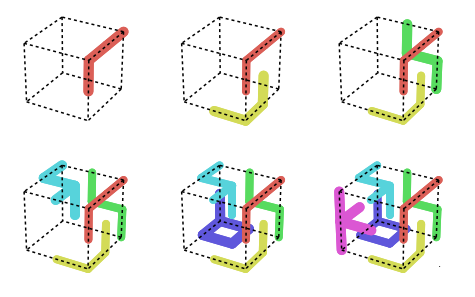

Solution 1 found.4, 7, 9, 10) [880/3003]]3]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.4, 7, 9, 12) [882/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.4, 7, 10, 12) [885/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.4, 9, 10, 12) [901/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.7, 8, 9, 10) [1001/3003]3]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.7, 8, 9, 12) [1003/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.7, 8, 10, 12) [1006/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.7, 9, 10, 11) [1011/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.7, 9, 11, 12) [1014/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.7, 10, 11, 12) [1017/3003]
Solution 2 found.
Max_solutions exceeded.

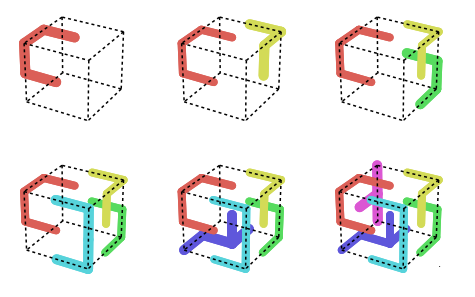

Solution 1 found.3, 7, 10, 11) [1382/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.4, 7, 8, 12) [1460/3003]]]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.4, 7, 9, 11) [1463/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.4, 7, 10, 11) [1466/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.5, 7, 9, 12) [1520/3003]]]
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
FOUND PUZZLE WITH 1 SOLUTIONS. PIECES: (1, 2, 5, 7, 9, 12)


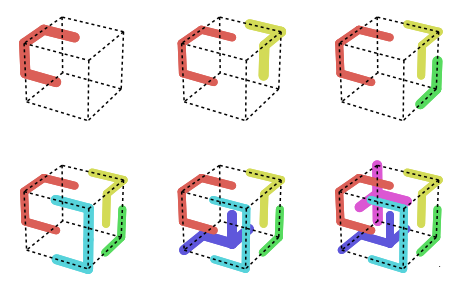

Solution 1 found.5, 7, 10, 12) [1523/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.6, 7, 9, 10) [1553/3003]3]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.7, 8, 10, 11) [1587/3003]]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.4, 7, 8, 12) [1670/3003]]3]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.4, 7, 9, 11) [1673/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.4, 7, 10, 11) [1676/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.5, 7, 9, 12) [1730/3003]]]
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.

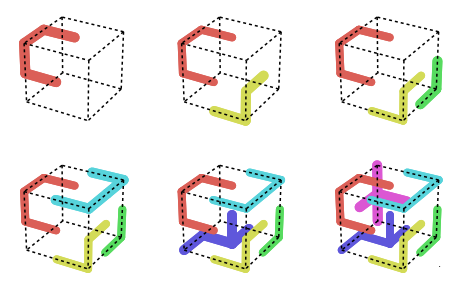

Solution 1 found.5, 7, 10, 12) [1733/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.6, 7, 9, 10) [1763/3003]3]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.7, 8, 10, 11) [1797/3003]]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.5, 7, 9, 12) [1856/3003]]3]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.5, 7, 10, 12) [1859/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.6, 7, 9, 10) [1889/3003]3]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.7, 8, 9, 11) [1920/3003]3]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.7, 8, 10, 11) [1923/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.7, 8, 10, 12) [1994/3003]]]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.7, 9, 10, 11) [1999/3003]
Solution 2 found.
Max_solutions

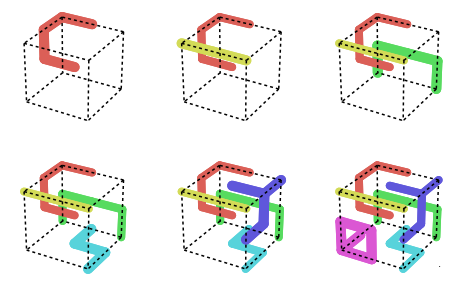

Solution 1 found.7, 9, 11, 12) [2037/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.7, 10, 11, 12) [2040/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.9, 10, 12, 13) [2071/3003]]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.4, 7, 10, 12) [2139/3003]3]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.7, 9, 10, 11) [2265/3003]]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.7, 8, 9, 12) [2383/3003]3]]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.7, 8, 10, 12) [2386/3003]
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 fo

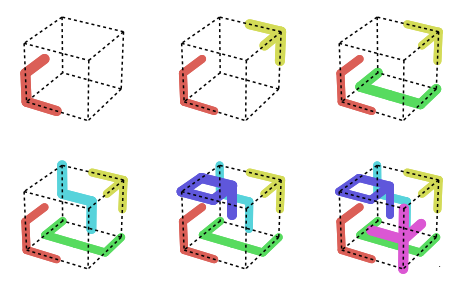

Solution 1 found.7, 9, 10, 11) [2391/3003]
Solution 1 found.
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.7, 9, 10, 12) [2462/3003]]]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.8, 9, 10, 11) [2521/3003]3]
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
FOUND PUZZLE WITH 1 SOLUTIONS. PIECES: (2, 7, 8, 9, 10, 11)


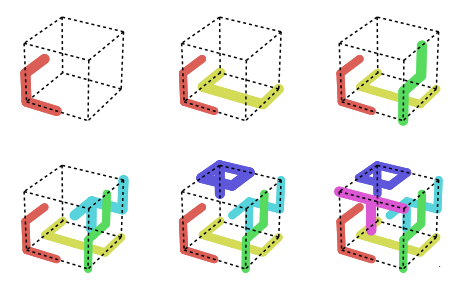

Solution 1 found.7, 8, 9, 12) [2635/3003]3]]
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
FOUND PUZZLE WITH 1 SOLUTIONS. PIECES: (3, 4, 7, 8, 9, 12)


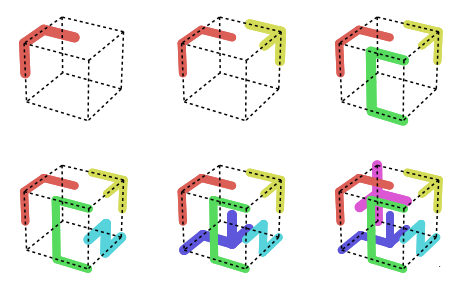

Solution 1 found.7, 8, 10, 12) [2638/3003]
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
FOUND PUZZLE WITH 1 SOLUTIONS. PIECES: (3, 4, 7, 8, 10, 12)


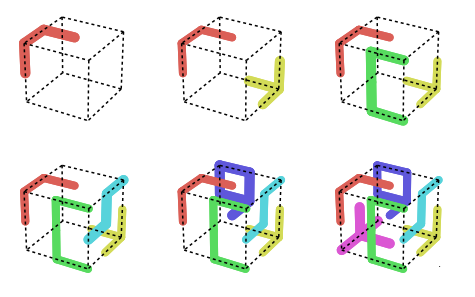

Solution 1 found.7, 9, 10, 11) [2643/3003]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.7, 9, 10, 12) [2714/3003]]]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.8, 9, 10, 11) [2773/3003]3]
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
FOUND PUZZLE WITH 1 SOLUTIONS. PIECES: (3, 7, 8, 9, 10, 11)


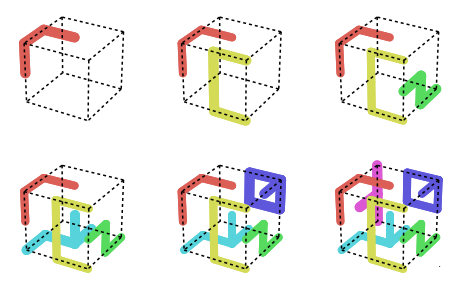

Solution 1 found.7, 9, 10, 12) [2840/3003]]]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.8, 9, 10, 11) [2899/3003]3]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.9, 10, 11, 12) [2914/3003]]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.8, 9, 10, 12) [2956/3003]3]
Solution 2 found.
Max_solutions exceeded. Aborting search.
Solution 1 found.9, 10, 11, 12) [2986/3003]]
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
Solution 1 found.
FOUND PUZZLE WITH 1 SOLUTIONS. PIECES: (6, 7, 9, 10, 11, 12)


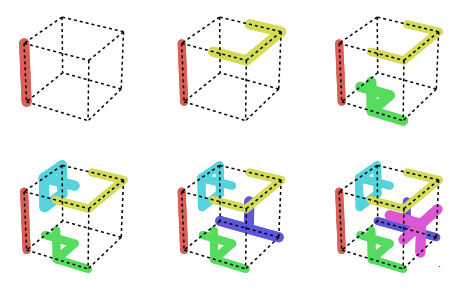

In [154]:
all_solutions = []

for i, pieces_indexes in enumerate(combinations):
    print(f"Exploring {pieces_indexes} [{i+1}/{len(combinations)}]", end="\r")
    pieces = allpieces[list(pieces_indexes)]
    
    solutions = explore(pieces, max_solutions=1, verbose=False)
     
    if solutions is not None and len(solutions) > 0:
        print(F"FOUND PUZZLE WITH {len(solutions)} SOLUTIONS. PIECES: {pieces_indexes}")
        drawMoves(solutions[0], size=(8,5), arrange=230, putPiecesIn=range(1, n_pieces+1))
        all_solutions.append([pieces_indexes, solutions])
    else:
        
        if solutions is None:
            all_solutions.append("Too many")
        elif len(solutions) == 0:
            all_solutions.append(None)
